## Ejemplo a mano


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

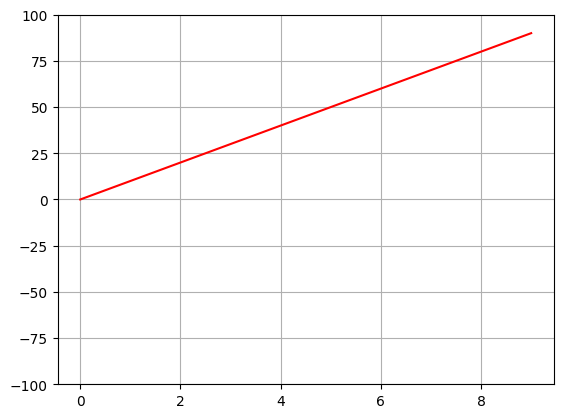

In [3]:
# Graficar una recta con su ecuación
# y = mx + b

x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
m = 10
b = 0
y = m * x + b

plt.plot(x, y, color='red')
plt.grid()
plt.ylim(-100, 100)
plt.show()

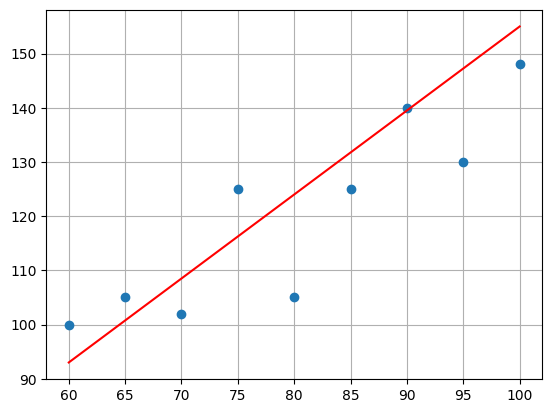

In [4]:
x = np.array([60, 65, 70, 75, 80, 85, 90, 95, 100])
y = np.array([100, 105, 102, 125, 105, 125, 140, 130, 148])

m = 1.55
b = 0

recta = m * x + b

plt.plot(x, y, 'o')
plt.plot(x, recta, color='red')
plt.grid()
plt.show()

In [5]:
x.sum(), len(x), y.sum()

(720, 9, 1080)

In [6]:
(x**2).sum(), (x*y).sum()

(59100, 88115)

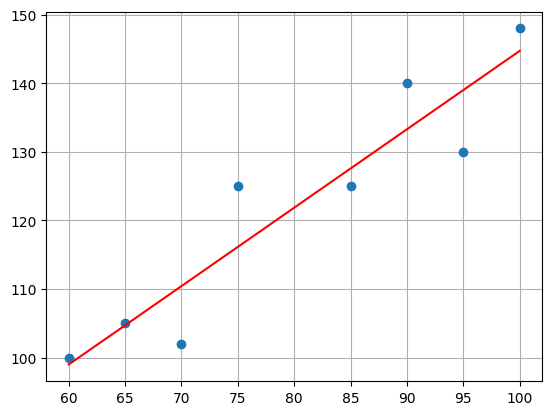

In [7]:
x = np.array([60, 65, 70, 75, 85, 90, 95, 100])
y = np.array([100, 105, 102, 125, 125, 140, 130, 148])

m = 343/300
b = 30.40

recta = m*x + b #wolframAlpha

plt.plot(x, y, 'o')
plt.plot(x, recta, color='red')
plt.grid()

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
modelo_lineal = LinearRegression()
#instancia
#ajusto y entreno

In [10]:
modelo_lineal.fit(x.reshape(-1, 1), y)

LinearRegression()

In [11]:
modelo_lineal.coef_ #pendiente
modelo_lineal.intercept_ #intersecto

#modelo es una versión simplificada de la naturaleza
#para encontrar patrones en determinadas condiciones

30.40833333333336

In [158]:
print(modelo_lineal.coef_) 
print(modelo_lineal.intercept_)

[1.14333333]
30.40833333333336


In [12]:
modelo_lineal.score(x.reshape(-1, 1), y) 
#comparación entre los datos reales y los predichos
#un score perfecto es de 1
#Dependiendo de lo que se trabaje 0.80 - 0.90

0.8695899624886819

Error cuadrático medio
Error cuadrático absoluto
Para saber cuando se equivocó nuestro modelo en general

In [13]:
modelo_lineal.predict([[200]]) #Para predicciones
#modelo.lineal.predict(x.reshape(-1, 1))

array([259.075])

In [14]:
m = 343/300
b = 30.40

m * 200 + b

259.06666666666666

In [15]:
# Error cuadratico medio 
predicciones = modelo_lineal.predict(x.reshape(-1, 1))

((y - predicciones)**2).sum() / (len(y)), ((y - predicciones)**2).mean()


(36.75729166666666, 36.75729166666666)

In [16]:
# Error absoluto medio
np.abs(y - predicciones).mean()

5.014583333333331

In [17]:
print('Score del modelo: ', modelo_lineal.score(x.reshape(-1, 1), y))
print('Error cuadrático medio: ', np.mean((modelo_lineal.predict(x.reshape(-1, 1)) - y) ** 2))
print('Error absoluto medio: ', np.abs(y - predicciones).mean())
print('Coeficiente de determinación: ', 1 - np.sum((modelo_lineal.predict(x.reshape(-1, 1)) - y) ** 2) / np.sum((y - np.mean(y)) ** 2))


Score del modelo:  0.8695899624886819
Error cuadrático medio:  36.75729166666666
Error absoluto medio:  5.014583333333331
Coeficiente de determinación:  0.8695899624886819


In [18]:

x = np.array([0, 2, 2.5, 1, 4, 7])
y = np.array([5, 10, 9, 0, 3, 27])
z = np.array([0, 1, 2, 3, 6, 2])


In [19]:
import pandas as pd


In [20]:
df = pd.DataFrame({'x': x, 'y': y, 'z': z})
df

,x,y,z
0,0.0,5,0
1,2.0,10,1
2,2.5,9,2
3,1.0,0,3
4,4.0,3,6
5,7.0,27,2


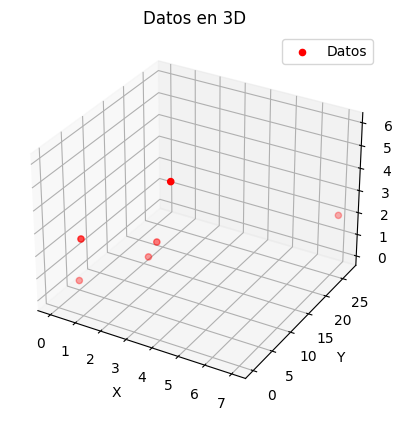

In [22]:
# Graficamos los puntos en un plano 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='r', label = 'Datos')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend()
plt.title('Datos en 3D')
plt.show()



In [207]:
fig = px.scatter_3d(x = x, y = y, z = z, height = 500, width = 500)
fig.update_layout(title = 'Datos en 3D')

In [ ]:
# Recta = mx + b
# Plano = m_1x_1 + m_2x_2 + b
# Hyperplano = m_1x_1 + m_2x_2 + m_3x_3 + ... + m_nx_n + b


In [208]:
# Regresión lineal
# Vamos a predecir la variable y a partir de las variables x e z
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# predictores = np.array([x, z]).T
# objetivo = y
# print(predictores)
# print(objetivo)

###############################
# Esto es lo mismo que lo anterior, pero esto es lo que haremos en todo el curso
predictores = df[['x', 'z']]
objetivo = df['y']

model.fit(predictores, objetivo)

LinearRegression()

In [210]:
df['predicciones'] = model.predict(predictores)
df

,x,y,z,predicciones
0,0.0,5,0,5.000000e+00
1,2.0,10,1,1.000000e+01
2,2.5,9,2,9.000000e+00
3,1.0,0,3,-1.776357e-15
4,4.0,3,6,3.000000e+00
5,7.0,27,2,2.700000e+01


In [212]:
#sin curvaturas
# Obtener los coeficientes de la regresión y el intercepto
print('Coeficientes: ', model.coef_)
print('Intercepto: ', model.intercept_)
print('Predicción para x = 3, z = 5: ', model.predict([[1, 3]]))

Coeficientes:  [ 4. -3.]
Intercepto:  5.000000000000001
Predicción para x = 3, z = 5:  [-1.77635684e-15]


In [213]:
# y = m1*x1 + m2*x2 + b
(1 * 4) + (3 * (-3)) + 5
# Esta es la predicción que nos da el modelo

0

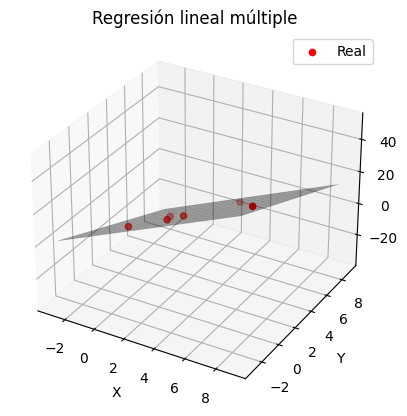

In [214]:
# Graficamos los puntos reales y un plano de regresión
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, z, y, c = 'r', label='Real')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Plano de regresión
x_surf = np.arange(-3, 10, 1)
z_surf = np.arange(-3, 10, 1)
x_surf, z_surf = np.meshgrid(x_surf, z_surf)
ax.plot_surface(x_surf, z_surf, model.predict(np.array([x_surf.ravel(), z_surf.ravel()]).T).reshape(x_surf.shape), color='None', alpha=0.4) 
plt.legend()
plt.title('Regresión lineal múltiple')
plt.show()



In [216]:
fig = px.scatter_3d(x = x, y = z, z = y, height = 500, width = 500)
# Añadimos el plano de regresión
fig.add_trace(go.Surface(x = x_surf, y = z_surf, z = model.predict(np.array([x_surf.ravel(), z_surf.ravel()]).T).reshape(x_surf.shape), opacity = 0.4))




In [217]:
# Obtener el score de la regresión y el error cuadrático medio
print('Score: ', model.score(predictores, y))
print('Error cuadrático medio: ', np.mean((model.predict(np.array([x, z]).T) - y) ** 2))

# Obtener el coeficiente de determinación
print('Coeficiente de determinación: ', 1 - np.sum((model.predict(np.array([x, z]).T) - y) ** 2) / np.sum((y - np.mean(y)) ** 2))

# Obtener el coeficiente de correlación
print('Coeficiente de correlación: ', np.corrcoef(model.predict(np.array([x, z]).T), y)[0, 1])


Score:  1.0
Error cuadrático medio:  1.0781099038020494e-29
Coeficiente de determinación:  1.0
Coeficiente de correlación:  1.0


In [89]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt

1. Coeficiente de determinación (R²): es una medida del porcentaje de variación en la variable objetivo explicada por las variables predictoras en un modelo de regresión. El valor de R² varía entre 0 y 1, donde un valor de 1 indica que el modelo explica completamente la variación en la variable objetivo, mientras que un valor de 0 indica que el modelo no explica ninguna variación en la variable objetivo. El coeficiente de determinación se calcula dividiendo la varianza explicada por el modelo entre la varianza total de la variable objetivo.

2. Coeficiente de correlación (r): es una medida de la fuerza y la dirección de la relación entre dos variables. El valor de r varía entre -1 y 1, donde un valor de 1 indica una relación positiva perfecta, un valor de -1 indica una relación negativa perfecta, y un valor de 0 indica una ausencia de relación. El coeficiente de correlación se calcula utilizando la covarianza entre dos variables dividida por el producto de sus desviaciones estándar.

In [90]:
# Horas de estudio, Calificación
# 2, 60
# 3, 70
# 4, 80
# 5, 85
# 6, 90
# 7, 92
# 8, 94
# 9, 96
# 10, 98
# 12, 100

import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd

horas = [2, 3, 4, 5, 6, 7, 8, 9, 10, 12]
calificaciones = [60, 70, 80, 85, 90, 92, 94, 96, 98, 100]

In [91]:
df_calificaciones = pd.DataFrame({'horas': horas, 'calificaciones': calificaciones})
df_calificaciones

,horas,calificaciones
0,2,60
1,3,70
2,4,80
3,5,85
4,6,90
5,7,92
6,8,94
7,9,96
8,10,98
9,12,100


In [92]:
model = LinearRegression()

objetivo = df_calificaciones['calificaciones']
predictores = df_calificaciones[['horas']]



model.fit(predictores, objetivo)

# R2 = model.score(np.array(horas).reshape(-1, 1), calificaciones)
# R = np.sqrt(R2)
# error_cuadratico_medio = np.mean((model.predict(np.array(horas).reshape(-1, 1)) - calificaciones) ** 2)


LinearRegression()

In [93]:
coeficientes = model.coef_
intercepto = model.intercept_
print("Coeficientes: ", coeficientes)
print("Intercepto: ", intercepto)


Coeficientes:  [3.74458874]
Intercepto:  61.785714285714285


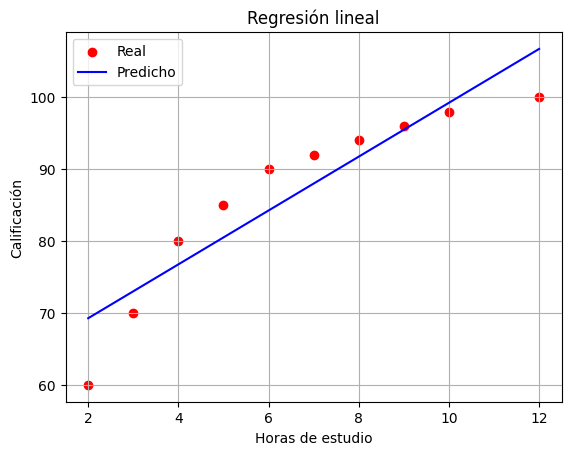

In [94]:
plt.scatter(horas, calificaciones, c='r', label = 'Real')
plt.plot(horas, model.predict(predictores), c='b', label='Predicho')
plt.xlabel('Horas de estudio')
plt.ylabel('Calificación')
# Imprime los coeficientes de la regresión en la gráfica en un rectángulo en la esquina inferior derecha
# plt.text(12, 60, 'Coeficientes: ' + str(coeficientes) + '\nIntercepto: ' + str(intercepto) + '\nError cuadrático medio: ' + str(error_cuadratico_medio) + '\nR2: ' + str(R2) + ' R: ' + str(R),
#             bbox=dict(facecolor='green', alpha=0.5, edgecolor='black'), horizontalalignment='right', verticalalignment='bottom')
plt.legend()
plt.grid()
plt.title('Regresión lineal')

# # Añade un recuadro con la ecuación de la recta
# plt.text(12, 74, 'y = ' + str(coeficientes[0]) + 'x + ' + str(intercepto), bbox=dict(facecolor='red', alpha=0.5, edgecolor='black'), horizontalalignment='right', verticalalignment='top')

# # Añade un recuadro con la predicción para 11 horas de estudio
# plt.text(12, 83, 'Predicción para 8 horas de estudio:\n' + str(model.predict([[8]])), bbox=dict(facecolor='pink', alpha=0.5, edgecolor='black'), horizontalalignment='right', verticalalignment='top')

plt.show()

In [95]:
print( f'R2 es {model.score(np.array(horas).reshape(-1, 1), calificaciones)}')
print( f'R es {np.sqrt(model.score(np.array(horas).reshape(-1, 1), calificaciones))}')

R2 es 0.8509869987702501
R es 0.9224895656701219


In [96]:
print( f'Error cuadrático medio es {np.mean((model.predict(np.array(horas).reshape(-1, 1)) - calificaciones) ** 2)}')

Error cuadrático medio es 22.68722943722942


In [97]:
model.predict([[8.3]])

array([92.86580087])

In [98]:
model.coef_ * 8.3 + model.intercept_

array([92.86580087])

In [99]:
# Año, Millaje, Precio
# 2010, 150000, 5000
# 2011, 100000, 6000
# 2012, 80000, 7000
# 2013, 60000, 8000
# 2014, 40000, 9000
# 2015, 30000, 10000
# 2016, 20000, 11000
# 2017, 15000, 12000
# 2018, 10000, 13000
# 2019, 5000, 14000

import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

años = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
millaje = [150000, 100000, 80000, 60000, 40000, 30000, 20000, 15000, 10000, 5000]
precio = [5000, 6000, 5000, 8000, 8000, 10000, 13000, 12000, 11000, 14000]


In [100]:

model = LinearRegression()
predictores = np.array([años, millaje]).T
model.fit(predictores, precio)

LinearRegression()

In [101]:
R2 = model.score(predictores, precio)
R = np.sqrt(R2)

coeficientes = model.coef_
intercepto = model.intercept_
error_cuadratico_medio = np.mean((model.predict(predictores) - precio) ** 2)

print("Coeficientes: ", coeficientes)
print("Intercepto: ", intercepto)


Coeficientes:  [ 9.86759756e+02 -2.16930557e-03]
Intercepto:  -1978516.8931554665


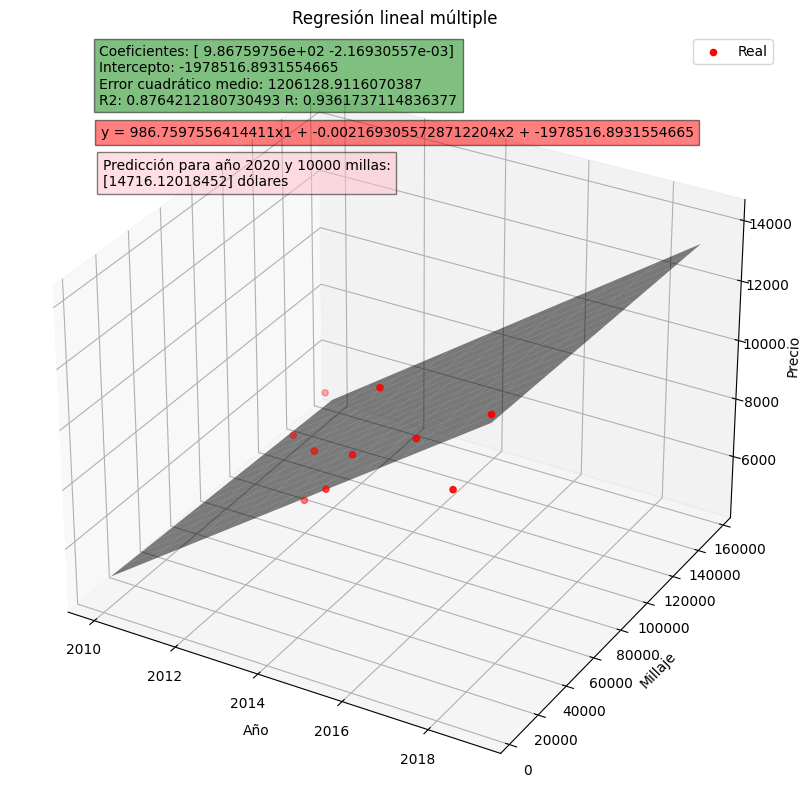

In [102]:
# Gráfica de los datos reales
fig = plt.figure( figsize=(10, 10) )
ax = fig.add_subplot(111, projection='3d')
ax.scatter(años, millaje, precio, c='r', label = 'Real')
ax.set_xlabel('Año')
ax.set_ylabel('Millaje')
ax.set_zlabel('Precio')
ax.set_title('Regresión lineal múltiple')

# Gráfica de la predicción
años_pred = np.arange(2010, 2020, 1)
millaje_pred = np.arange(5000, 160000, 10000)
años_pred, millaje_pred = np.meshgrid(años_pred, millaje_pred)
precio_pred = model.predict(np.array([años_pred.ravel(), millaje_pred.ravel()]).T).reshape(años_pred.shape)
ax.plot_surface(años_pred, millaje_pred, precio_pred, color='none', alpha=0.5)

# Imprime los coeficientes de la regresión en la gráfica en un rectángulo en la esquina inferior derecha
ax.text(2010, 10000, 20000, 'Coeficientes: ' + str(coeficientes) + '\nIntercepto: ' + str(intercepto) + '\nError cuadrático medio: ' + str(error_cuadratico_medio) + '\nR2: ' + str(R2) + ' R: ' + str(R),
            bbox=dict(facecolor='green', alpha=0.5, edgecolor='black'))
# Añade una leyenda a la gráfica con la ecuación de la recta
ax.text(2010, 10000, 19000, 'y = ' + str(coeficientes[0]) + 'x1 + ' + str(coeficientes[1]) + 'x2 + ' + str(intercepto), bbox=dict(facecolor='red', alpha=0.5, edgecolor='black'))

# Añade una leyenda a la gráfica con la predicción para 2020 y 10000 millas
ax.text(2010, 10000, 17500, 'Predicción para año 2020 y 10000 millas:\n' + str(model.predict([[2020, 10000]])) + ' dólares', bbox=dict(facecolor='pink', alpha=0.5, edgecolor='black'))


ax.legend()

plt.show()

# El error cuadrático medio se abrevia MSE (Mean Squared Error)